In [2]:
!pip install -q tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 745.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.5 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensions-4.10.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attemp

In [3]:
class color:
    BOLD = '\033[1m'
    BOLD_COLOR = '\033[1m' + '\033[34m'
    END = '\033[0m'

print(color.BOLD_COLOR + 'Importing libarli...' + color.END)

# Model
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras import layers,losses,optimizers
from keras.callbacks import EarlyStopping,LearningRateScheduler
from keras.utils import plot_model # Visualine layers model

# Model ResNet50V2
from keras.applications import ResNet50V2

# Model VGG16
from keras.applications.vgg16 import VGG16

# Basic
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

print(color.BOLD + '\nTensorflow Version: {}'.format(tf.__version__))
print('\nKeras Version: {}'.format(keras.__version__) + color.END)

print(color.BOLD_COLOR + '\nDone!' + color.END)

Importing libarli...

Tensorflow Version: 2.13.0

Keras Version: 2.13.1

Done!


# Version 2 Update 04/20/2024 

In [7]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
validation_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

TRAIN_BATCH_SIZE = 24
VALIDATION_BATCH_SIZE = 64
IMAGE_SIZE = (244,244)
CLASS_MODE = 'categorical'

## ImageDataGenerator train_data

In [8]:
print(color.BOLD)

train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    fill_mode = 'nearest',
    horizontal_flip = True,
    vertical_flip = True
)


train_generator = train_data.flow_from_directory(
    directory = train_dir,
    target_size = IMAGE_SIZE,
    class_mode = CLASS_MODE,
    batch_size = TRAIN_BATCH_SIZE,
    shuffle = True
)




Found 14034 images belonging to 6 classes.


In [9]:
print(color.BOLD)

validation_data = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

validation_generator = validation_data.flow_from_directory(
    directory = validation_dir,
    target_size = IMAGE_SIZE,
    class_mode = CLASS_MODE,
    batch_size = VALIDATION_BATCH_SIZE
)


Found 3000 images belonging to 6 classes.


In [10]:
print(color.BOLD)

test_generator = validation_data.flow_from_directory(
    directory = validation_dir,
    target_size = IMAGE_SIZE,
    class_mode = CLASS_MODE,
    batch_size = VALIDATION_BATCH_SIZE,
    subset = 'validation'
)


Found 598 images belonging to 6 classes.


In [11]:
print(color.BOLD)
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)
print(color.END)


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}



## ResNet50V2

In [12]:
print(color.BOLD)
conv_base = ResNet50V2(
    weights = 'imagenet',
    include_top = False,
    input_shape = (244,244,3)
)


94668760/94668760 [==============================] - 1s 0us/step


In [13]:
conv_base.trainable = False

In [14]:
model_resnet50 = keras.models.Sequential([
    
    conv_base,
    layers.Flatten(),
    layers.Dense(1048,use_bias = False, activation= 'relu'),
    layers.BatchNormalization(),
    
    layers.Dense(2048,activation = 'relu'),
    layers.Dropout(0.1),
    layers.Dense(6,activation='softmax')
    
])

print(color.BOLD_COLOR + '\nVanilla Model layers and output shapes with params...\n'+color.END)

print(color.BOLD)
model_resnet50.summary()


Vanilla Model layers and output shapes with params...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 1048)              137363456 
                                                                 
 batch_normalization (Batch  (None, 1048)              4192      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2048)              2148352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         

In [15]:
plot_model(model_resnet50,show_shapes=True,expand_nested=True,dpi = 80)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
print(color.BOLD_COLOR + '\nSetting a decay learning rate for learning rate schedule\n' + color.END)
epoch = 50
learning_rate = 3e-5
lr_start = 0.00000001
lr_min = 0.000001
lr_max = 3e-5
lr_rampup_epochs = 1
lr_sustain_epochs = 1
lr_exp_decay = .8

def lrfn(epoch):
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start)/lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) * lr_exp_decay**(epoch - lr_rampup_epochs - lr_sustain_epochs) + lr_min
    return lr

print(color.BOLD_COLOR + 'Done!' + color.END)


Setting a decay learning rate for learning rate schedule

Done!


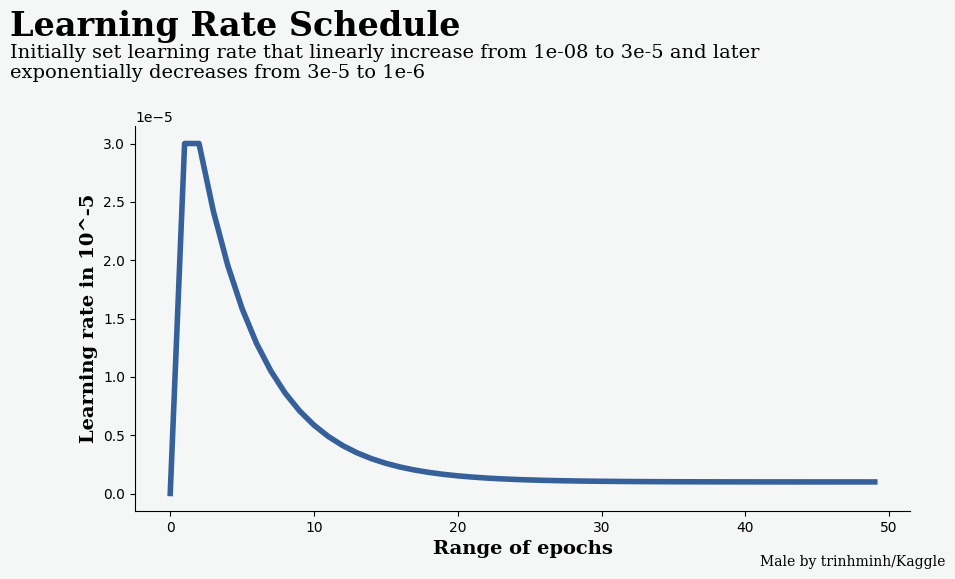

In [17]:
colors = ['#36609A', '#FFCE30', '#194350']
epochs = 20
epochs_range = [i for i in range(50 if epochs < 50 else epochs)]
learning_rate = [lrfn(x) for x in epochs_range]

fig,ax = plt.subplots(figsize = (10,5))
fig.patch.set_facecolor('#f5f6f6')
ax.set_facecolor('#f5f6f6')

for loc in ['right','top']:
    ax.spines[loc].set_visible(False)
    
ax.plot(epochs_range,learning_rate,linewidth = 4,color = colors[0])
plt.xlabel('Range of epochs',
           {'fontfamily':'serif','size':14,'color':'black','weight':'bold'})
plt.ylabel('Learning rate in 10^-5',
           {'fontfamily':'serif','size':14,'color':'black','weight':'bold'})

plt.gcf().text(0,1.06,'Learning Rate Schedule',
               {'fontfamily':'serif','size': 24,'color':'black','weight':'bold'})

plt.gcf().text(0,0.975,'Initially set learning rate that linearly increase from 1e-08 to 3e-5 and later\n' 
               + 'exponentially decreases from 3e-5 to 1e-6',
               {'fontfamily':'serif','size':14,'color':'black'})
plt.gcf().text(0.75,0,'Male by trinhminh/Kaggle',
               {'fontfamily':'serif','size':10,'color':'black'})

plt.gcf().show()

In [18]:
print(color.BOLD_COLOR + '\nSetting early stopping facor and learning rate schedule\n' + color.END)

earlystop = EarlyStopping(patience=5)
lr_callback = LearningRateScheduler(lrfn,verbose=True)

callbacks = [earlystop,lr_callback]
print(color.BOLD_COLOR + 'Done!')


Setting early stopping facor and learning rate schedule

Done!


In [19]:
model_resnet50.compile(
    loss = losses.CategoricalCrossentropy(from_logits = False),
    optimizer = optimizers.Adam(1e-5),
    metrics = ['accuracy']
)

In [ ]:
print(color.BOLD)

epochs = 10
resnet50_history = model_resnet50.fit(
    train_generator,
    validation_data = test_generator,
    epochs = epochs,
    callbacks = callbacks
)

In [22]:
print(color.BOLD)
model_resnet50.evaluate(validation_generator)


47/47 [==============================] - 196s 4s/step - loss: 0.2031 - accuracy: 0.9253


[0.20305053889751434, 0.9253333210945129]

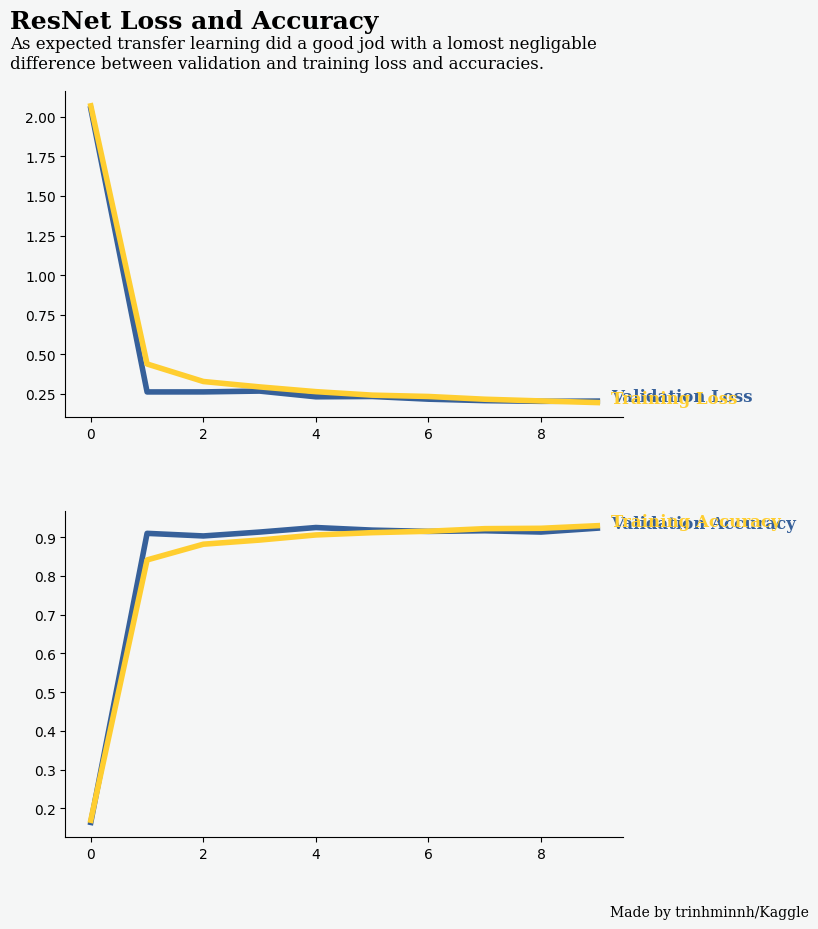

In [34]:
fig,ax = plt.subplots(2,1,figsize = (8,8),dpi=100)
fig.patch.set_facecolor('#f5f6f6')

axes = ax.ravel()

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['right','top']:
        ax.spines[loc].set_visible(False)
        
        
hist2 = resnet50_history.history
Epochs = range(len(hist2['loss']))

sns.lineplot(x = Epochs,y=hist2['val_loss'], ax = axes[0],linewidth = 4, color = colors[0])
sns.lineplot(x = Epochs,y=hist2['loss'],ax = axes[0],linewidth = 4,color = colors[1])

axes[0].text(Epochs[-1]+0.25,hist2['val_loss'][-1],'Validation Loss',
            {'fontfamily': 'serif','size':12,'weight':'bold','color':colors[0]})
axes[0].text(Epochs[-1]+0.25,hist2['loss'][-1],'Training Loss',
             {'fontfamily':'serif','size':12,'weight':'bold','color':colors[1]})


sns.lineplot(x = Epochs,y=hist2['val_accuracy'],ax = axes[1],linewidth=4,color = colors[0])
sns.lineplot(x = Epochs,y=hist2['accuracy'],ax = axes[1],linewidth=4,color = colors[1])

axes[1].text(Epochs[-1]+0.25,hist2['val_accuracy'][-1],'Validation Accuracy',
             {'fontfamily':'serif','size':12,'weight':'bold','color':colors[0]})
axes[1].text(Epochs[-1]+0.25,hist2['accuracy'][-1],'Training Accuracy',
             {'fontfamily':'serif','size':12,'weight':'bold','color':colors[1]})



fig.text(0,1.06, 'ResNet Loss and Accuracy',
         {'fontfamily':'serif','size':18,'weight':'bold'})
fig.text(0,1.01,'As expected transfer learning did a good jod with a lomost negligable'
        + '\ndifference between validation and training loss and accuracies.',
         {'fontfamily':'serif','size':12})
fig.text(0.75,-0.05,'Made by trinhminnh/Kaggle',
         {'fontfamily':'serif','size':10,'color':'black'})

plt.tight_layout(h_pad = 5)

fig.show()

In [41]:
print(color.BOLD)
test_image_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

valida = ImageDataGenerator(rescale = 1./255)

test_image_generator = valida.flow_from_directory(
    directory = test_image_dir,
    target_size = IMAGE_SIZE,
    class_mode = CLASS_MODE,
    batch_size = VALIDATION_BATCH_SIZE
)

print(test_image_generator.class_indices)


Found 3000 images belonging to 6 classes.
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [43]:
model_resnet50.evaluate(test_image_generator)

47/47 [==============================] - 211s 4s/step - loss: 0.2031 - accuracy: 0.9253


[0.20305049419403076, 0.9253333210945129]

1/1 [==============================] - 0s 127ms/step
[[4.6033994e-03 3.8212506e-06 9.7183975e-06 5.3005574e-06 8.6897426e-06
  9.9536902e-01]]
Street


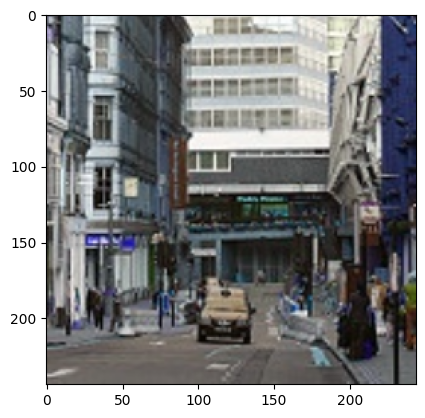

In [56]:
cate = ['Building','Forest','Glacier','Mountain','Sea','Street']

test_img = cv2.imread('/kaggle/input/intel-image-classification/seg_pred/seg_pred/10012.jpg')

test_img_resized = cv2.resize(test_img, (244, 244))

test_input = np.array(test_img_resized)

test_input = np.expand_dims(test_input, axis=0)

test_input = test_input / 255.0

y_pre = model_resnet50.predict(test_input)

y_classes = [np.argmax(y_pre)][0]
print(y_pre)

print(cate[y_classes])

plt.imshow(test_img_resized)
plt.show()

In [89]:
model_resnet50.save('Resnet50v2_Building_Sea.h5')

# Version 1

In [ ]:
class_names = ['mountain','street','glacier','buildings','sea','forest']
class_names_label = {class_names: i for i, class_names in enumerate(class_names)}

nb_class = len(class_names)

In [ ]:
IMAGE_SIZE = (180,180)

def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    datasets = ['/kaggle/input/intel-image-classification/seg_train/seg_train',
                '/kaggle/input/intel-image-classification/seg_test/seg_test']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(train_images,train_labels),(test_images,test_labels) = load_data()

In [ ]:
train_images,train_labels = shuffle(train_images,train_labels,random_state = 25)

In [ ]:
test_images,test_labels = shuffle(test_images,test_labels,random_state = 25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]


print("Number of training example: {}".format(n_train))
print("Number of testing example: {}".format(n_test))
print("Each image is of size: {}".format(IMAGE_SIZE))

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def display_images(class_names,images,labels):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle("Some example of images of the datasets",fontsize = 16)
    for i in range(15):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i],cmap= plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


display_images(class_names,train_images,train_labels)            

In [ ]:
train_images.shape,train_labels.shape

In [ ]:
test_images.shape,test_labels.shape

In [ ]:
train_images.dtype,train_labels.dtype

In [ ]:
train_labels[0]

In [ ]:
model = keras.models.Sequential([
    layers.Conv2D(32,(3,3),activation= 'relu',input_shape = (180, 180, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(6,activation='softmax')   
])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [ ]:
epochs = 20
batch_size = 128
history = model.fit(
    train_images,
    train_labels,
    epochs = epochs,
    batch_size=batch_size,
    validation_split=0.2
)
tf.get_logger().setLevel('ERROR')

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

In [ ]:
history_dic = history.history

In [ ]:
history_dic.keys()

In [ ]:
train_loss,val_loss = history_dic['loss'],history_dic['val_loss']
train_acc,val_acc = history_dic['accuracy'],history_dic['val_accuracy']

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
epochs_run = [i + 1 for i in range(epochs)]

ax1.plot(epochs_run,train_loss,label = 'Training Loss')
ax1.plot(epochs_run,val_loss,label = 'Accuracy Loss')
ax1.set(title = 'Training vs Accuracy Loss',xlabel = 'Epochs',ylabel = 'Loss')
ax1.legend()

ax2.plot(epochs_run,train_acc,label = 'Training Accuracy')
ax2.plot(epochs_run,val_acc,label = 'Validation Accuracy')
ax2.set(title = 'Training vs Validation Accuracy',xlabel = 'Epochs',ylabel = 'Accuracy')
ax2.legend()

plt.show()

In [ ]:
class_names = ['mountain','street','glacier','buildings','sea','forest']
test_image = cv2.imread('/kaggle/input/intel-image-classification/seg_test/seg_test/sea/20072.jpg')
test_image.shape
test_image = cv2.resize(test_image,(180,180))
test_input = test_image.reshape((1,180,180,3))
plt.imshow(test_image)
y_pre = model.predict(test_input)
y_classes = [np.argmax(y_pre)][0]
print(class_names[y_classes])

## VGG 16

In [21]:
model_vgg16 = VGG16(weights = 'imagenet',
                    include_top = False,
                    input_shape = (224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [22]:
model_vgg16.tranabl = False

In [23]:
print(color.BOLD)

model_vgg16 = keras.Sequential([
    model_vgg16,
    layers.Flatten(),
    layers.Dense(528,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1048,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(6,activation = 'softmax')
])

model_vgg16.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 528)               13246992  
                                                                 
 dropout_1 (Dropout)         (None, 528)               0         
                                                                 
 dense_4 (Dense)             (None, 1048)              554392    
                                                                 
 dropout_2 (Dropout)         (None, 1048)              0         
                                                                 
 dense_5 (Dense)             (None, 6)               

In [24]:
plot_model(model = model_vgg16,show_shapes = True,
           show_dtype=True,show_layer_activations = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
model_vgg16.compile(optimizer = keras.optimizers.Adam(0.1),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
print(color.BOLD)

epochs_vgg16 = 10
batch_size_vgg16 = 128

history_model_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data = test_generator,
    epochs = epochs_vgg16,
    batch_size = batch_size_vgg16, 
    callbacks = callbacks
)

# Ensemble Neural Networks

In [ ]:
np.random.seed(seed = 1997)

n_estimators = 10

max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50,100,size = n_estimators)

for i in range(n_estimators):
    
    model3 = keras.Sequential([
        layers.Flatten(input_shape = (x,y,z)),
        layers.Dense(random[i],activation = 'relu'),
        layers.Dense(6,activation='softmax')    
    ])
    

    model3.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )

    models.append(model3)

In [ ]:
histories = []

epochs = 10

for i in range(n_estimators):
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(
        models[i].fit(
        train_features[train_idx],
        train_labels[train_idx],
        batch_size = 128,
        epochs = epochs,
        validation_split = 0.1
        )
    )

In [ ]:
prediction = []

for i in range(n_estimators):
    prediction.append(models[i].predict(test_features))
    
prediction = np.array(prediction)
prediction = prediction.sum(axis = 0)
prediction = prediction.argmax(axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy: {}".format(accuracy_score(test_labels,prediction)))

# Fine Tuning VGG ImageNet

In [ ]:
from keras.models import Model

model = VGG16(weights = 'imagenet',include_top = False)
model = Model(inputs = model.inputs,outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
from keras.layers import Input, Dense, Flatten, Conv2D, Activation, MaxPooling2D
from keras.models import Model

# Load the VGG16 model without the fully connected layers
model2 = VGG16(weights='imagenet', include_top=False)

# Define the input shape
input_shape = model2.output_shape[-4]

# Define the input layer for your new model
layer_input = Input(shape=(11, 11, 512))

# Pass the input through the base model layers
x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)

# Add your own additional layers
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(6, activation='softmax')(x)

# Create the new model
new_model = Model(inputs=layer_input, outputs=x)


In [ ]:
new_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
new_model.summary()

In [ ]:
history4 = new_model.fit(train_features,
                        train_labels,
                        batch_size=128,
                        epochs=10,
                        validation_split = 0.2
                       )

In [ ]:
prediction = new_model.predict(test_features)
pre_label = np.argmax(prediction,axis = 1)
print("Accuracy :{}".format(accuracy_score(test_labels,pre_label)))

In [ ]:
# Model DenseNet201
from keras.layers import Dropout,BatchNormalization

model_VGG16 = keras.Sequential()
model_VGG16.add(VGG16)
model_VGG16.add(MaxPooling2D())
model_VGG16.add(Dropout(0.5))
model_VGG16.add(BatchNormalization())
model_VGG16.add(Flatten())
model_VGG16.add(Dropout(0.2)) 
model_VGG16.add(Dense(256, activation="relu"))
model_VGG16.add(Dense(6, activation="softmax" , name="classification"))

In [ ]:
# Menambahkan optimizer, loss, dan metrics
from keras.optimizers import Adam

model_VGG16.compile(optimizer=Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

# Ringkasan Model
model_VGG16.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    verbose=1,
    mode="max",
    restore_best_weights=True)